# Trabalho Prático - Python para Ciência de Dados

IFMG - Instituto Federal de Educação, Ciência e Tecnologia de Minas Gerais - Especialização em Inteligência Artificial  

Mat.: Programação Genética 

Prof.: Carlos Alexandre Silva

Aluno: Christhian da S. Gonçalves 

## 01 - Sobre o Conjunto de Dados

O conjunto de dados de previsão de diabetes é uma coleção de dados médicos e demográficos de pacientes, juntamente com seu status de diabetes (positivo ou negativo). Os dados incluem características como idade, sexo, índice de massa corporal (IMC), hipertensão, doenças cardíacas, histórico de tabagismo, nível de HbA1c e nível de glicose no sangue.

Link: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

## 02 - Análise exploratória dos dados

### 2.1 - Importando Bibliotecas

In [94]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import BinaryEncoder

from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score
from random import randint
from sklearn import svm
from imblearn.over_sampling import SMOTE
from deap import base, creator, tools, algorithms

import random
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import tpot
from tpot import TPOTClassifier
#permite que os gráficos do Matplotlib sejam exibidos diretamente no notebook
%matplotlib inline
#import warnings #controla o tratamento de avisos (warnings) durante a execução do código
#warnings.filterwarnings("ignore") #ignora avisos durante a execução do código

### 2.2 - Importando base de dados

In [2]:
#Importando dados
df_diabete = pd.read_csv('https://raw.githubusercontent.com/christhiangoncalves/Machine_Learning_Genetic_Programming/main/Diabetes_Dataset/diabetes_prediction_dataset.csv')
df_diabete.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### 2.3 - Analisando dados

In [3]:
#Imformações do tipo dos dados das colunas
df_diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
#Descrição estatistica dos dados
df_diabete.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [5]:
#verificação se existem dados nulos
df_diabete.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
#Verifica numero de linhas duplicadas
df_diabete.duplicated().sum()

3854

In [7]:
#Excluindo 3854 linhas duplicadas
df_diabete.drop_duplicates(inplace=True)

### 2.4 Plotando Gráficos

In [8]:
'''sns.countplot(x="gender", data=df_diabete)
plt.title("Gender Distribution")
plt.show()

sns.countplot(x="hypertension", data=df_diabete)
plt.title("Hypertension Distribution")
plt.show()

sns.countplot(x="heart_disease", data=df_diabete)
plt.title("Heart Disease Distribution")
plt.show()

sns.countplot(x="smoking_history", data=df_diabete)
plt.title("Smoking History Distribution")
plt.show()'''

'sns.countplot(x="gender", data=df_diabete)\nplt.title("Gender Distribution")\nplt.show()\n\nsns.countplot(x="hypertension", data=df_diabete)\nplt.title("Hypertension Distribution")\nplt.show()\n\nsns.countplot(x="heart_disease", data=df_diabete)\nplt.title("Heart Disease Distribution")\nplt.show()\n\nsns.countplot(x="smoking_history", data=df_diabete)\nplt.title("Smoking History Distribution")\nplt.show()'

In [9]:
#Codificando as colunas do genero e histórico de fumante
le = LabelEncoder()
df_temp = df_diabete.groupby('smoking_history')['smoking_history'].count()
df_diabete["gender_encoded"] = le.fit_transform(df_diabete["gender"])
df_diabete["smoking_history_encoded"] = le.fit_transform(df_diabete["smoking_history"])

#Excluindo colunas "gender" e "smoking_history", pois foi criado colunas codificadas
del df_diabete["smoking_history"]
del df_diabete["gender"]

display(df_temp,df_diabete.groupby('smoking_history_encoded')['smoking_history_encoded'].count())


smoking_history
No Info        32887
current         9197
ever            3998
former          9299
never          34398
not current     6367
Name: smoking_history, dtype: int64

smoking_history_encoded
0    32887
1     9197
2     3998
3     9299
4    34398
5     6367
Name: smoking_history_encoded, dtype: int64

In [10]:
'''plot1 = ['diabetes','age', 'hypertension','heart_disease']
plot2 = ['diabetes','bmi','HbA1c_level','blood_glucose_level']
plot3 = ['diabetes','gender_encoded','smoking_history_encoded']
sns.pairplot(df_diabete[plot1],hue= 'diabetes')'''

"plot1 = ['diabetes','age', 'hypertension','heart_disease']\nplot2 = ['diabetes','bmi','HbA1c_level','blood_glucose_level']\nplot3 = ['diabetes','gender_encoded','smoking_history_encoded']\nsns.pairplot(df_diabete[plot1],hue= 'diabetes')"

Pode-se verificar as seguintes relações:
- Quanto maior a idade, maior a frequência de diabetes.
- Quanto maor a idade e possui hipertensão, maoior é a incidência de diabetes.
- Quanto maor a idade e possui doênça do coração, maoior é a incidência de diabetes.

In [11]:
'''sns.pairplot(df_diabete[plot2],hue= 'diabetes')'''

"sns.pairplot(df_diabete[plot2],hue= 'diabetes')"

É possivel notar uma grande correlação entre os rotulos de dados acima, onde temos:
Quanto maior a glicose e o nível de HbA1C(Hemoglobina Glicada) no sangue maior o indice de diabéticos.
O bmi(indice de massa corporal) não possui uma relação forte com quantidade de diabéticos 

In [12]:
'''sns.pairplot(df_diabete[plot3],hue= 'diabetes')'''

"sns.pairplot(df_diabete[plot3],hue= 'diabetes')"

Pode-se verificar as seguintes relações:
- Indice de diabetes é independente do genero
- Indice de diabetes é independente se é fumante ou não, porém ocorre um leve aumento de diabétes com os ex fumantes e não fumantes.

In [13]:
#Mapa de Correlação
'''plt.figure(figsize=(12,8))
sns.heatmap(df_diabete.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')'''

"plt.figure(figsize=(12,8))\nsns.heatmap(df_diabete.corr(),annot=True,cmap='coolwarm')\nplt.title('Correlation Heatmap')"

# 03 - Modelo de programação genética

### 3.1 - Seleção de Caracteristicas (Features)

In [54]:
#Definição de funções
classifiers = ['LinearSVM', 'RadialSVM',
               'Logistic',  'RandomForest',
               'AdaBoost',  'DecisionTree',
               'KNeighbors','GradientBoosting']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)]


def acc_score(df,label):
    Score = pd.DataFrame({"Classificador":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1
    Score["Acurácia"] = acc
    Score.sort_values(by="Acurácia", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def plot(score,x,y,c = 'b'):
    gen = [1,2,3,4,5]
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Geração", ylabel="Acurácia")
    ax.set(ylim=(x,y))



In [29]:
#Funções de machine learning - programação genetica

#Função para iniciar a população aleatória
""" Essa função cria uma população inicial aleatória de cromossomos booleanos com um conjunto específico
de características ativadas e desativadas. A partir dessa população inicial, um algoritmo de 
Programação Genética pode evoluir esses indivíduos por meio de seleção, cruzamento (recombinação) e 
mutação para encontrar soluções melhores ao longo das gerações. """
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=bool) 
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

#Função de aptidão
""" Avalia a pontuação de aptidão de cada cromossomo na população.Para cada cromossomo, o algoritmo
ajusta um modelo GradientBoostingClassifier usando as características ativadas e calcula a 
acurácia do modelo no conjunto de teste.  """
def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],Y_train)
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

#Função de Seleção
""" Seleciona os melhores cromossomos da população com base em suas pontuações de aptidão. Os 'n_parents' 
cromossomos com as maiores pontuações de aptidão são selecionados para a próxima geração."""
def selection(pop_after_fit,n_parents): 
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

#Função de Cruzamento
""" Realiza o cruzamento (recombinação) entre os cromossomos selecionados para gerar novos cromossomos
para a próxima geração. """
def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen

#Função de Mutação
""" Realiza mutação nos cromossomos da população após o cruzamento. A mutação ocorre com uma taxa de 
mutation_rate, onde algumas características são alternadas entre ativadas e desativadas aleatoriamente. """
def mutation(pop_after_cross,mutation_rate,n_feat):
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen

#Função de Gerações
""" A função inicializa uma população, avalia a aptidão, executa a seleção, cruzamento e mutação para 
cada geração. Logo após retorna a geração e seu score de   """
def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen = initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Melhor score da geração',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [117]:
#dividindo base em 2 dataframes
df_diabete.reset_index(drop=True, inplace=True)
x = df_diabete.drop(['diabetes'],axis=1)
y = df_diabete['diabetes']
#X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)


print("Dataset de diabetes:\n",df_diabete.shape[0],"Registros\n",df_diabete.shape[1],"Atributos")

Dataset de diabetes:
 96146 Registros
 9 Atributos


In [20]:
#Verificando qual melhor classificador
score1 = acc_score(x,y)
score1

,Classificador,Acurácia
0,GradientBoosting,0.970753
1,AdaBoost,0.970712
2,RandomForest,0.968798
3,LinearSVM,0.957773
4,Logistic,0.957441
5,KNeighbors,0.951491
6,DecisionTree,0.949453
7,RadialSVM,0.945501


In [118]:
#Divide os dataframes x e y em bases de treino e teste. 
X_train, X_test, Y_train, Y_test = split(x,y)


In [47]:
#Mostra a acuracia das 5 gerações geradas
chromo_df_diabetes, score_df_diabetes = generations(x,y,size=40,n_feat=x.shape[1],n_parents=32,mutation_rate=0.20,n_gen=5,
                         X_train = X_train, X_test = X_test,Y_train = Y_train,Y_test = Y_test)

Melhor score da geração 1 : [0.9707118192786122]
Melhor score da geração 2 : [0.9706286142197446]
Melhor score da geração 3 : [0.9707534218080459]
Melhor score da geração 4 : [0.9707118192786122]
Melhor score da geração 5 : [0.9707534218080459]


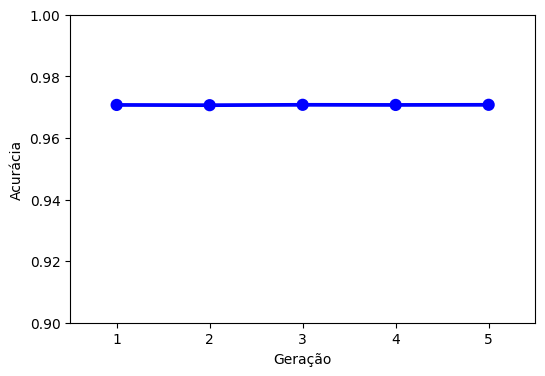

In [60]:
#Comparação de acurácia
plot(score_df_diabetes,0.9,1,c = "blue")

In [80]:
#Mostra quais as features são relevantes no cromossomo com melhor pontuação das 5 gerações geradas. Auxilia na redução de features do modelo.
#Melhor score da geração 3 : [0.9707534218080459]
display('Melhor cromossomo: ',chromo_df_diabetes[2], 'Colunas:',x.head())

'Melhor cromossomo: '

array([ True,  True,  True, False,  True,  True,  True,  True])

'Colunas:'

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_encoded,smoking_history_encoded
0,80.0,0,1,25.19,6.6,140,0,4
1,54.0,0,0,27.32,6.6,80,0,0
2,28.0,0,0,27.32,5.7,158,1,4
3,36.0,0,0,23.45,5.0,155,0,1
4,76.0,1,1,20.14,4.8,155,1,1


A melhor geração de cromossomos considera as (Features) ou colunas 'bmi' (Indice de massa corporal) e 'smoking_history_encoded'(histórico de fumante) pouco relevante para o processo de classificação utilizando o me

In [98]:
# Função para avaliar a aptidão do indivíduo para seleção de características. 
""" A função evaluate() recebe um cromossomo como entrada, seleciona os recursos (características) com valor "1" no cromossomo e,
em seguida, treina o modelo utilizando apenas esses recursos para realizar a classificação. Por fim, a função retorna a 
pontuação de aptidão do modelo com base nas previsões feitas nos dados de teste. """
def evaluate(individual):
    selected_features = [index for index in range(len(individual)) if individual[index] == 1]
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]
    clf = GradientBoostingClassifier()
    clf.fit(X_train_selected, Y_train)
    y_pred = clf.predict(X_test_selected)
    return accuracy_score(Y_test, y_pred),

In [135]:
# Dividindo o data frame em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_test.count()

19230

In [112]:
# Para remover  as classes FitnessMax e Individual se já estiverem presentes
if 'FitnessMax' in globals():
    del globals()['FitnessMax']
if 'Individual' in globals():
    del globals()['Individual']

In [120]:
#define os componentes necessários para utilizar a biblioteca 'deap' em um algoritmo de programação genética
creator.create("FitnessMax", base.Fitness, weights=(1.0,)) #cria um novo tipo chamado FitnessMax, que herda da classe 'base.Fitness' da biblioteca deap. peso (1.0,), para problema de maximização (maximizar a precisão)
creator.create("Individual", list, fitness=creator.FitnessMax) #cria um novo tipo chamado 'Individual', que é uma lista e terá um atributo fitness do tipo FitnessMax que criado anteriormente. cada indivíduo terá uma lista de valores binários representando o cromossomo e um atributo
toolbox = base.Toolbox() #Cria uma instância da classe 'base.Toolbox()' para registrar as funções e operadores que serão usados no algoritmo genético.
toolbox.register("attr_bool", random.randint, 0, 1) #função usada para gerar aleatoriamente valores binários que serão usados para criar os cromossomos dos indivíduos.
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(x.columns)) # criar indivíduos do tipo Individual
toolbox.register("population", tools.initRepeat, list, toolbox.individual) #criar uma população, que é uma lista de indivíduos
toolbox.register("evaluate", evaluate) #Mede a aptidão de cada indivíduo.
toolbox.register("mate", tools.cxTwoPoint) #cruzamento dos indivíduos para a evolução da população.
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05) #Operador inverte aleatoriamente alguns bits nos cromossomos dos indivíduos.
toolbox.register("select", tools.selTournament, tournsize=3) #seleciona indivíduos com base em um torneio entre 3 indivíduos

#Os componentes registrados no toolbox são essenciais para realizar a evolução dos cromossomos e encontrar um conjunto de recursos que maximize a precisão do modelo usando a programação genética.

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [136]:
# Definindo o algoritmo genético
population_size = 100
generations = 20
population = toolbox.population(n = population_size)
for gen in range(generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb = 0.5, mutpb = 0.1)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k = len(population))

# Obtendo o melhor indivíduo
best_individual = tools.selBest(population, k = 1)[0]
print("Melhor indivíduo:", best_individual)

ValueError: Found input variables with inconsistent numbers of samples: [76916, 72109]